In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

pd.set_option('display.max_rows', None)
sns.set(rc={'figure.figsize':(18,8)})

DATA_ROOT = '../../../data'

# User data

In [2]:
users_df = pd.read_json(f'{DATA_ROOT}/bgg_UserItem.jl', lines = True)

In [3]:
#Number of users
len(users_df)

396800

In [4]:
# Data available
users_df.columns

Index(['bgg_user_name', 'country', 'first_name', 'item_id', 'last_login',
       'last_name', 'region', 'registered', 'updated_at', 'external_link',
       'image_file', 'image_url'],
      dtype='object')

In [5]:
# Sample of data
users_df[['bgg_user_name', 'country', 'region']].head(20)

,bgg_user_name,country,region
0,beastvol,United States,California
1,fu_koios,United States,Ohio
2,mycroft,United States,New Mexico
3,woh,Belgium,NaN
4,(mostly) harmless,Austria,NaN
5,- v -,NaN,NaN
6,-=yod@=-,Spain,NaN
7,-de-,Poland,NaN
8,-grizzly-,Czech Republic,Unspecified
9,-johnny-,Canada,Quebec


<AxesSubplot:>

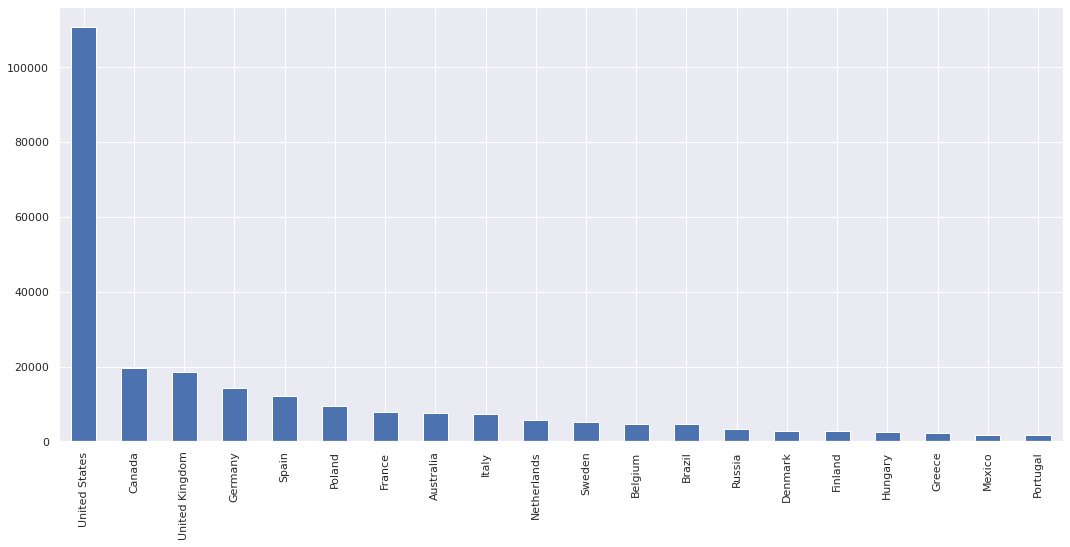

In [6]:
# User distribution by country
users_df['country'].value_counts()[:20].plot(kind='bar')

# Rating data

40,200,532 entries

In [7]:
# Can't read entire file
ratings_df = pd.read_json(f'{DATA_ROOT}/bgg_RatingItem.jl', lines = True, nrows=20)

In [8]:
# Data available
ratings_df.columns

Index(['bgg_id', 'bgg_user_name', 'bgg_user_owned', 'bgg_user_rating',
       'item_id', 'updated_at', 'bgg_user_want_to_play', 'comment'],
      dtype='object')

In [9]:
# Sample of data
ratings_df[['bgg_user_name', 'bgg_id', 'bgg_user_rating', 'bgg_user_owned', 'bgg_user_want_to_play']].head(20)

,bgg_user_name,bgg_id,bgg_user_rating,bgg_user_owned,bgg_user_want_to_play
0,beastvol,13,8.0,1.0,NaN
1,beastvol,118,7.0,1.0,NaN
2,beastvol,278,7.0,1.0,NaN
3,beastvol,823,6.0,1.0,NaN
4,beastvol,3076,9.0,1.0,NaN
5,beastvol,5737,8.0,1.0,NaN
6,beastvol,9209,7.0,1.0,NaN
7,beastvol,12004,5.0,1.0,NaN
8,beastvol,18602,9.0,1.0,NaN
9,fu_koios,38453,NaN,NaN,NaN


In [3]:
# Read partial data in batches
batch_size = 1000000
n_iter = 0
ratings_df = pd.DataFrame()
with open(f'{DATA_ROOT}/bgg_RatingItem.jl') as f:
    batch = pd.read_json(f, lines=True, nrows=batch_size)
    while not batch.empty:
        clear_output()
        print(n_iter)
        ratings_df = ratings_df.append(batch[['bgg_id', 'bgg_user_name', 'bgg_user_rating',
                                              'bgg_user_owned', 'bgg_user_play_count', 'bgg_user_want_to_play',
                                              'bgg_user_want_to_buy']])
        batch = pd.read_json(f, lines=True, nrows=batch_size)
        n_iter += 1

41


In [4]:
# Total number of entries
len(ratings_df)

41576094

## Attributes usability

### bgg_user_rating

In [5]:
print(f"Lowest rating present in the set: {ratings_df['bgg_user_rating'].min()}")
print(f"Highest rating present in the set: {ratings_df['bgg_user_rating'].max()}")

Lowest rating present in the set: 1.4013e-45
Highest rating present in the set: 10.0


In [6]:
# Round the ratings
ratings_fixed = pd.Series(index=np.arange(11), dtype='int64')
user_ratings = ratings_df['bgg_user_rating'].value_counts()

for idx, val in zip(user_ratings.index, user_ratings.values):
    ratings_fixed[np.rint(idx)] += val

In [7]:
# Frequency of each rating
ratings_fixed

0          18
1       95688
2      159208
3      309523
4      649663
5     1264654
6     3424120
7     4344733
8     4917233
9     1764915
10    1014243
dtype: int64

In [8]:
# Total number of ratings
ratings_fixed.sum()

17943998

<AxesSubplot:>

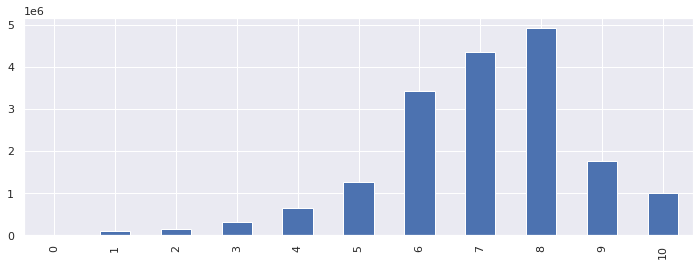

In [9]:
# Frequency of ratings illustrated
plt.figure(figsize=(12,4))
ratings_fixed.plot(kind='bar')

### bgg_user_owned

In [10]:
# Number of items marked as owned
ratings_df['bgg_user_owned'].value_counts()

1.0    22637845
0.0      358879
Name: bgg_user_owned, dtype: int64

### bgg_user_want_to_play

In [11]:
# Number of items marked "want to play"
ratings_df['bgg_user_want_to_play'].value_counts()

1.0    2275597
0.0     887375
Name: bgg_user_want_to_play, dtype: int64

### bgg_user_want_to_buy

In [12]:
# Number of items marked "want to buy"
ratings_df['bgg_user_want_to_buy'].value_counts()

0.0    916585
1.0    733191
Name: bgg_user_want_to_buy, dtype: int64

### bgg_user_play_count

In [13]:
play_counts = ratings_df['bgg_user_play_count'].value_counts()[:100]

In [14]:
# Numbers of times users said they played the game
play_counts[:20]

1.0     5328226
2.0     2024506
3.0     1128661
0.0      867256
4.0      707788
5.0      513237
6.0      365066
7.0      268197
8.0      212574
10.0     164668
9.0      161471
11.0     114945
12.0     101274
13.0      79402
14.0      68421
15.0      66349
16.0      52727
17.0      44683
18.0      39796
20.0      39454
Name: bgg_user_play_count, dtype: int64

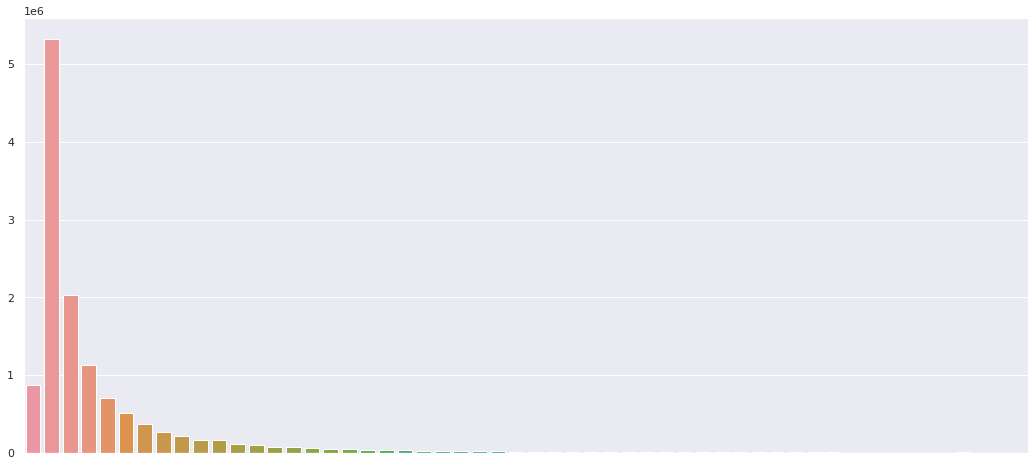

In [15]:
sns.barplot(x=play_counts.index, y=play_counts.values).set(xticks=[])
pass

## Rating statistics by games

In [16]:
game_stats = ratings_df[['bgg_id', 'bgg_user_owned', 'bgg_user_rating']].groupby('bgg_id').agg('count')

In [17]:
# Number of games marked as owned by over 10,000 people
(game_stats['bgg_user_owned'] > 10000).sum()

377

In [18]:
# Number of games rated by over 10,000 people
(game_stats['bgg_user_rating'] > 10000).sum()

326

## Rating statistics by users

In [19]:
user_stats = ratings_df[['bgg_user_name', 'bgg_user_owned', 'bgg_user_rating']].groupby('bgg_user_name').agg('count')

In [20]:
# Number of users who rated over 20 games
(user_stats['bgg_user_rating'] > 20).sum()

155850

In [21]:
# Number of users who own over 20 games
(user_stats['bgg_user_owned'] > 20).sum()

194906